In [1]:
import tensorflow as tf
print(tf.__version__)
#!pip install tensorflow==2.0.0-alpha0

2.0.0-alpha0


In [0]:
with open('poetry.txt') as f:
  poem = f.read()
poem = poem.lower()
poem = poem.split('\n')

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(poem)

In [0]:
word_index = tokenizer.word_index
vocab_len = len(word_index)+1
max_length = max([len(x.split()) for x in poem])
embedding_dim = 64
oov_tok = "<OOV>"
pad_type = 'pre'
trunc_type = 'pre'

In [0]:
train = []
for sentence in poem:
  sen_split = sentence.split()
  for i in range(1,len(sen_split)):
    pre_sentence = " ".join(sen_split[:i+1])
    train.append(pre_sentence)

In [6]:
import numpy as np
sequences = tokenizer.texts_to_sequences(train)
sequences[0:10]

[[51, 12],
 [51, 12, 96],
 [51, 12, 96, 1217],
 [51, 12, 96, 1217, 48],
 [51, 12, 96, 1217, 48, 2],
 [51, 12, 96, 1217, 48, 2, 69],
 [2, 11],
 [2, 11, 15],
 [2, 11, 15, 31],
 [2, 11, 15, 31, 361]]

In [0]:
padded_final = np.array(pad_sequences(sequences,maxlen = max_length,padding=pad_type,truncating=trunc_type))
xs = padded_final[:,:-1]
labels = padded_final[:,-1]
ys = tf.keras.utils.to_categorical(labels,num_classes=vocab_len)

In [8]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_len,embedding_dim))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)))
model.add(tf.keras.layers.Dropout(rate=0.15))
model.add(tf.keras.layers.Dense(vocab_len,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          172160    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                24832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 2690)              174850    
Total params: 371,842
Trainable params: 371,842
Non-trainable params: 0
_________________________________________________________________


In [9]:
num_epochs = 2000
model.compile(optimizer = 'adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(xs,ys,epochs=num_epochs)

Epoch 1/2000
11976/11976 [==============================] - 9s 777us/sample - loss: 6.7605 - accuracy: 0.0647
Epoch 2/2000
11976/11976 [==============================] - 9s 739us/sample - loss: 6.3190 - accuracy: 0.0660
Epoch 3/2000
11976/11976 [==============================] - 9s 733us/sample - loss: 6.2100 - accuracy: 0.0661
Epoch 4/2000
11976/11976 [==============================] - 9s 736us/sample - loss: 6.1027 - accuracy: 0.0752
Epoch 5/2000
11976/11976 [==============================] - 9s 746us/sample - loss: 5.9949 - accuracy: 0.0802
Epoch 6/2000
11976/11976 [==============================] - 9s 738us/sample - loss: 5.8985 - accuracy: 0.0845
Epoch 7/2000
11976/11976 [==============================] - 9s 752us/sample - loss: 5.8124 - accuracy: 0.0860
Epoch 8/2000
11976/11976 [==============================] - 9s 753us/sample - loss: 5.7389 - accuracy: 0.0913
Epoch 9/2000
11976/11976 [==============================] - 9s 740us/sample - loss: 5.6679 - accuracy: 0.0954
Epoch 10/2

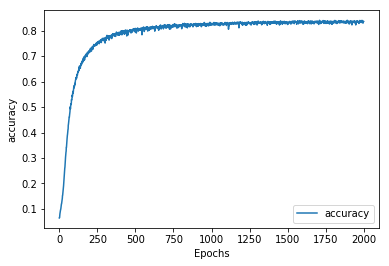

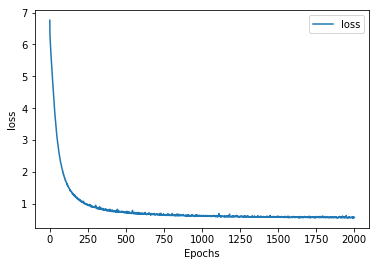

In [14]:
import matplotlib.pyplot as plt
def plot_graph(history,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string])
  plt.show()
  
plot_graph(model.history,'accuracy')
plot_graph(model.history,'loss')

In [0]:
rev=dict()
for (word,key) in word_index.items():
  rev[key]=word

In [17]:
test = "Kissed the loved ones and the friends we would"
next_words = 100
for loop_key in range(next_words):
  seq=tokenizer.texts_to_sequences([test])[0]
  pad = pad_sequences([seq],maxlen=max_length,padding='pre',truncating = 'pre')
  predicted = model.predict_classes(pad,verbose=0)
  test = test+" "+rev[predicted[0]]
test

'Kissed the loved ones and the friends we would neer see again died again was my rats air make day before mairi an loaded tree and their wintry on no dont there ill praise we say them thats the beautiful came oer our sons once gone their fare there for feet shoes there sweet and ive can stand and the bath and me roared to appear in a albert died in its black and lofty day turning taken her sit him gone came a true mans better ye raise their joking their bring god stole your day wheeled theres oftimes an armless new sweetest to blarney to stop gone'

In [0]:
model.save('LSTM_poetry.h5')